# STAT-H400 - Lab 4: Unsupervised methods

This lab focuses on exploring unsupervised learning techniques for dimensionality reduction and data clustering.

**Objectives:**

* Apply dimensionality reduction techniques to reduce the number of features in a dataset.
* Identify clusters within a dataset representing groups of similar data points.

**Breast Cancer Dataset Exploration**

We'll be working with the "Breast Cancer Wisconsin" dataset, readily available from scikit-learn using `sklearn.datasets.load_breast_cancer`. This dataset contains features extracted from breast cancer biopsies and corresponding diagnoses (benign or malignant).

**BreastCancerDataset Class (provided)**

A helper class named `BreastCancerDataset` (available on the Virtual University or Gitlab) simplifies data access and preprocessing. Here's how to use it:

```python
from breast_cancer import BreastCancerDataset

data = BreastCancerDataset()

print(f"{data.Xtrain.shape[0]} cases in training set.")
print(f"{data.Xtest.shape[0]} cases in test set.")

# Show mean and standard deviation of the training set for each feature
features = data.columns
for i in range(len(data.columns)):
  print(features[i], data.Xtrain[:, i].mean(), data.Xtrain[:, i].std(ddof=1))

## Step 1: Data Preparation

* **Zero-centering:** 
    * Subtract the mean of each variable from the data to obtain a zero-centered matrix.



In [3]:
# Importation des bibliothèques nécessaires
import numpy as np
from breast_cancer import BreastCancerDataset

# Chargement du jeu de données du cancer du sein
data = BreastCancerDataset()

# Extraction des données d'entraînement
Xtrain = data.Xtrain

# Calcul de la matrice centrée sur zéro
# On soustrait la moyenne de chaque variable (colonne) à ses valeurs correspondantes
X_centered = Xtrain - Xtrain.mean(axis=0)

# Affichage de la matrice centrée
print("Matrice centrée sur zéro :")
print(X_centered)



Matrice centrée sur zéro :
[[ -0.63800879   1.26564835  -2.70540659 ...   0.09177287   0.0675011
    0.02702963]
 [ -0.82800879   5.99564835  -7.24540659 ...  -0.05327713  -0.0465989
   -0.01599037]
 [ -0.01800879  -3.59435165  -1.75540659 ...  -0.03116713  -0.0773989
   -0.01677037]
 ...
 [  0.21199121   2.46564835   2.28459341 ...   0.03137287   0.0681011
    0.01752963]
 [ -1.69800879   7.60564835 -10.19540659 ...   0.03257287   0.0305011
    0.03662963]
 [ -0.98800879   0.05564835  -8.73540659 ...  -0.10221713  -0.0470989
   -0.02098037]]


### Analyse statistique des résultats

La matrice centrée sur zéro, obtenue en soustrayant la moyenne de chaque variable à ses valeurs correspondantes, a plusieurs implications statistiques :

1. **Moyenne nulle :** Chaque colonne de la matrice centrée a désormais une moyenne égale à 0. Cela signifie que la distribution de chaque variable est recentrée autour de son point central, facilitant les comparaisons entre variables.

2. **Variance conservée :** Le processus de centrage n'affecte pas la dispersion ou la variance des données. Ainsi, les caractéristiques de la variabilité des données restent intactes.

3. **Préparation aux analyses statistiques :** Le centrage est une étape clé pour certaines méthodes statistiques et algorithmiques comme l'analyse en composantes principales (ACP) ou les modèles de régression linéaire, car il garantit que les calculs ne sont pas biaisés par des différences d'échelle entre les variables.

4. **Visualisation des données :** Les données centrées sont plus faciles à interpréter graphiquement, car elles éliminent les décalages dus à des moyennes non nulles, rendant ainsi les relations entre les variables plus évidentes.

Ce centrage est une étape préliminaire essentielle pour de nombreuses analyses multivariées, car il contribue à standardiser les données et à éliminer l'influence des écarts de moyenne entre les variables.


## step 2 
* **Covariance Matrix:**
    * Compute the covariance matrix using the `cov` method from NumPy. 
    * **Important:** Ensure the `rowvar=False` parameter is set correctly in the `cov` function to calculate the covariance matrix correctly.
    * Verify the expected shape of the covariance matrix.


In [5]:
import numpy as np

# Calcul de la matrice variance-covariance
# On s'assure que les colonnes (features) sont traitées comme variables
cov_matrix = np.cov(X_centered, rowvar=False)

# Affichage de la forme et d'un aperçu de la matrice
print("Forme de la matrice de covariance :", cov_matrix.shape)
print("Matrice de covariance :")
print(cov_matrix)


Forme de la matrice de covariance : (30, 30)
Matrice de covariance :
[[ 1.18565847e+01  4.84690754e+00  8.16196051e+01  1.14679444e+03
   8.59129441e-03  9.12169509e-02  1.83571148e-01  1.07932732e-01
   1.45289458e-02 -7.31710041e-03  6.07935089e-01 -1.36155503e-01
   4.39566424e+00  1.05084631e+02 -2.24419031e-03  1.27236979e-02
   2.04058349e-02  7.95696214e-03 -2.59570947e-03 -3.71017279e-04
   1.55452615e+01  6.30305212e+00  1.07273973e+02  1.72775235e+03
   9.66210754e-03  2.26110254e-01  3.84910178e-01  1.66278702e-01
   3.65082767e-02  1.59423070e-03]
 [ 4.84690754e+00  1.89799066e+01  3.39159810e+01  4.62596758e+02
  -1.47870670e-03  5.17031679e-02  1.01042874e-01  4.69279966e-02
   8.44247939e-03 -2.47568049e-03  3.07653536e-01  9.66846291e-01
   2.27907779e+00  4.47265947e+01  7.25867438e-05  1.41342549e-02
   1.84364249e-02  4.50382000e-03  2.48883408e-04  6.37373950e-04
   7.06059416e+00  2.43426325e+01  4.97509604e+01  7.76128599e+02
   7.31098556e-03  1.79771062e-01  2.6

### Analyse des résultats

1. **Matrice variance-covariance :**
   - La matrice variance-covariance est une matrice carrée dont la taille est égale au nombre de variables (colonnes du jeu de données). Elle décrit les variances (sur la diagonale) et les covariances (en dehors de la diagonale) entre les différentes variables.
   - La forme de cette matrice, affichée dans le programme, confirme sa dimensionnalité correcte.


## Step 3: Eigenvalue Decomposition

* **Eigenvalue Decomposition:** 
    * Perform eigenvalue decomposition of the covariance matrix using `linalg.eig` from NumPy.
    * Obtain the eigenvalues and eigenvectors of the covariance matrix.


In [6]:
# Décomposition en valeurs propres et vecteurs propres
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Affichage des valeurs propres et des vecteurs propres
print("Valeurs propres :")
print(eigenvalues)
print("\nVecteurs propres :")
print(eigenvectors)

# Tri des valeurs propres et des vecteurs propres dans l'ordre décroissant des valeurs propres
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

# Affichage des résultats triés
print("\nValeurs propres triées :")
print(eigenvalues)
print("\nVecteurs propres triés :")
print(eigenvectors)


Valeurs propres :
[3.88349172e+05 6.22976970e+03 5.91631654e+02 5.19724536e+01
 3.51801443e+01 2.76211359e+00 1.70251274e+00 3.47958772e-01
 1.30545231e-01 7.29692933e-02 2.64496492e-02 7.24723698e-03
 3.21341166e-03 2.03155381e-03 1.36754520e-03 6.25209600e-04
 3.97614209e-04 2.32049263e-04 1.86265615e-04 1.63103406e-04
 7.48532758e-05 5.60991195e-05 3.71862559e-05 2.78978957e-05
 1.56325180e-05 1.27316997e-05 7.20639374e-07 3.33347547e-06
 2.61675534e-06 2.01226915e-06]

Vecteurs propres :
[[ 5.35642529e-03  8.50395043e-03 -1.23248097e-02  2.52137260e-02
  -4.27170616e-02 -1.17876618e-01  5.95444115e-02 -9.68852116e-02
   4.00472287e-01  8.60218197e-02 -3.57040428e-01  7.35505509e-01
   2.56751390e-01 -1.18968284e-01  9.14792591e-02 -1.49191519e-01
   4.84627374e-02  9.52505248e-02  2.19627356e-02  7.73638221e-02
   6.71758298e-02  6.25342629e-03 -2.60142771e-03 -3.24671455e-02
   8.17558958e-04 -1.19604008e-03  1.62499059e-03 -3.65380689e-03
  -3.80035919e-03  4.21982372e-04]
 [ 2.3

### Analyse des résultats

2. **Valeurs propres :**
   - Les valeurs propres représentent la quantité de variance capturée par chaque composante principale (dimension). Ces valeurs permettent de déterminer l'importance relative des différentes dimensions dans les données.
3. **Vecteurs propres :**
   - Les vecteurs propres représentent les directions des composantes principales. Ils forment une base orthogonale dans l'espace des données et sont associés aux valeurs propres correspondantes.
   - Le tri des valeurs propres et vecteurs propres en ordre décroissant garantit que les dimensions les plus importantes (avec la variance la plus élevée) sont traitées en premier.

Ces résultats servent souvent de base pour des analyses comme l'ACP (Analyse en Composantes Principales), qui vise à réduire la dimensionnalité tout en conservant un maximum d'information.


## Step 4: PCA using scikit-learn

* **PCA with scikit-learn:** 
    * Use the `PCA` class from scikit-learn to perform Principal Component Analysis on the data.
    * Extract the principal components and the explained variance ratio from the fitted PCA model.
    * Verify that the principal components and explained variance correspond to the eigenvectors and eigenvalues obtained from the eigenvalue decomposition.


In [7]:
from sklearn.decomposition import PCA
import numpy as np

# Réalisation de l'Analyse en Composantes Principales (ACP) avec scikit-learn
pca = PCA()
pca.fit(X_centered)

# Affichage des variances expliquées (valeurs propres) et des composantes principales (vecteurs propres)
print("Variance expliquée par l'ACP (valeurs propres) :")
print(pca.explained_variance_)

print("\nComposantes principales (vecteurs propres) :")
print(pca.components_)

# Vérification si les valeurs propres correspondent au calcul manuel
print("\nLes valeurs propres correspondent-elles ?")
print(np.allclose(eigenvalues, pca.explained_variance_))

# Vérification si les vecteurs propres correspondent au calcul manuel
print("\nLes vecteurs propres correspondent-ils ?")
print(np.allclose(eigenvectors.T, pca.components_))  # Les vecteurs propres doivent être transposés

# Comparaison des vecteurs propres en valeurs absolues
eigenvectors_match = np.allclose(
    np.abs(pca.components_.T),  # Transposer les composantes PCA pour correspondre à la forme
    np.abs(eigenvectors),
    atol=1e-6  # Tolérance pour les comparaisons en virgule flottante
)

print("\nLes vecteurs propres correspondent-ils en valeurs absolues ?")
print(eigenvectors_match)


Variance expliquée par l'ACP (valeurs propres) :
[3.88349172e+05 6.22976970e+03 5.91631654e+02 5.19724536e+01
 3.51801443e+01 2.76211359e+00 1.70251274e+00 3.47958772e-01
 1.30545231e-01 7.29692933e-02 2.64496492e-02 7.24723702e-03
 3.21341166e-03 2.03155381e-03 1.36754520e-03 6.25209602e-04
 3.97614209e-04 2.32049263e-04 1.86265615e-04 1.63103406e-04
 7.48532761e-05 5.60991195e-05 3.71862559e-05 2.78978958e-05
 1.56325180e-05 1.27316997e-05 3.33347547e-06 2.61675535e-06
 2.01226915e-06 7.20639374e-07]

Composantes principales (vecteurs propres) :
[[ 5.35642529e-03  2.33437461e-03  3.69521098e-02  5.29671153e-01
   4.87449146e-06  4.37619886e-05  8.78386255e-05  5.08628935e-05
   8.01003654e-06 -2.68754456e-06  3.07887382e-04 -5.80656972e-05
   2.19023643e-03  5.21966452e-02 -8.28335705e-07  6.13819581e-06
   1.00192928e-05  3.64301003e-06 -1.14486561e-06 -7.39371565e-08
   7.37757868e-03  3.18192291e-03  5.08413799e-02  8.44197856e-01
   7.28477447e-06  1.11841679e-04  1.87848880e-04 

### Analyse des résultats

1. **ACP avec scikit-learn :**
   - Les variances expliquées (valeurs propres) et les composantes principales (vecteurs propres) calculées via `PCA` correspondent bien aux résultats obtenus manuellement. 
   - Les valeurs propres sont égales aux variances expliquées, et les vecteurs propres représentent les directions principales des données centrées.


## Step 5: Explained Variance and Dimensionality Reduction

* **Determine number of components for 90% variance:** 
    * Calculate the cumulative explained variance ratio.
    * Determine the minimum number of principal components required to explain 90% of the variance in the data.

In [8]:
# Calcul de la variance expliquée cumulée
explained_variance_ratio_cumulative = np.cumsum(pca.explained_variance_ratio_)

# Déterminer le nombre minimum de composantes pour expliquer 90 % de la variance
n_components_90 = np.argmax(explained_variance_ratio_cumulative >= 0.9) + 1

print("\nNombre de variables nécessaires pour expliquer 90 % de la variance :")
print(n_components_90)

# Affichage de la variance expliquée cumulée
print("\nVariance expliquée cumulée :")
print(explained_variance_ratio_cumulative)



Nombre de variables nécessaires pour expliquer 90 % de la variance :
1

Variance expliquée cumulée :
[0.98250882 0.9982699  0.99976671 0.9998982  0.9999872  0.99999419
 0.9999985  0.99999938 0.99999971 0.99999989 0.99999996 0.99999998
 0.99999999 0.99999999 1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.        ]


2. **Correspondance des calculs :**
   - La vérification avec `np.allclose` confirme que les valeurs propres et les vecteurs propres obtenus avec `PCA` et via le calcul manuel sont identiques ou très proches, dans les limites de la précision des nombres en virgule flottante.


## Step 6: PCA on Standardized Data

* **Standardize data:** 
    * Standardize the data by dividing each variable by its standard deviation.
* **PCA on standardized data:**
    * Perform PCA on the standardized data using the `PCA` class from scikit-learn.
* **Determine number of components for 90% variance:** 
    * Calculate the cumulative explained variance ratio for the standardized data.
    * Determine the minimum number of principal components required to explain 90% of the variance in the standardized data.
    * Compare the results with the PCA performed on the non-standardized data.


#### Ce code standardise un jeu de données, effectue une ACP pour réduire la dimensionnalité et détermine combien de composantes principales sont nécessaires pour conserver 90 % de l'information présente dans les données. Cela est utile pour la simplification et la visualisation des données tout en minimisant la perte d'information.
- code combiné dans 1 seul code 


In [9]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load the breast cancer dataset
from breast_cancer import BreastCancerDataset
data = BreastCancerDataset()
Xtrain = data.Xtrain

# Standardize the data
scaler = StandardScaler()
X_standardized = scaler.fit_transform(Xtrain)

# Perform PCA on the standardized data
pca = PCA()
pca.fit(X_standardized)

# Compute cumulative explained variance
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

# Find the number of components needed to explain 90% of the variance
n_components_90 = np.argmax(cumulative_variance_ratio >= 0.9) + 1

# Display results
print("Cumulative Explained Variance Ratio:", cumulative_variance_ratio)
print(f"Number of components needed to explain 90% of the variance: {n_components_90}")

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np

# Standardize the data
scaler = StandardScaler()
X_standardized = scaler.fit_transform(Xtrain)

# Perform PCA again on the standardized data
pca_standardized = PCA()
pca_standardized.fit(X_standardized)

# Compute cumulative explained variance
cumulative_variance_ratio_standardized = np.cumsum(pca_standardized.explained_variance_ratio_)

# Find the number of components needed for 90% explained variance
n_components_90_standardized = np.argmax(cumulative_variance_ratio_standardized >= 0.9) + 1

# Display results
print("Cumulative Explained Variance Ratio (Standardized Data):", cumulative_variance_ratio_standardized)
print(f"Number of components needed to explain 90% of the variance: {n_components_90_standardized}")
import numpy as np

# Compute the cumulative explained variance ratio
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

# Find the number of components required to reach 90% explained variance
n_components_90 = np.argmax(cumulative_variance_ratio >= 0.9) + 1  # Add 1 since indexing starts at 0

print("Cumulative Explained Variance Ratio:", cumulative_variance_ratio)
print(f"Number of components needed to explain 90% of the variance: {n_components_90}")


Cumulative Explained Variance Ratio: [0.44417366 0.63160762 0.73213467 0.79921701 0.85343196 0.89133836
 0.9120476  0.9275222  0.94113592 0.95235547 0.96175629 0.97030089
 0.97860149 0.9838138  0.98685695 0.98948924 0.99149319 0.99338518
 0.99482254 0.99587766 0.99681782 0.9976521  0.99833884 0.99893399
 0.99944977 0.99969915 0.99992088 0.99997308 0.99999583 1.        ]
Number of components needed to explain 90% of the variance: 7
Cumulative Explained Variance Ratio (Standardized Data): [0.44417366 0.63160762 0.73213467 0.79921701 0.85343196 0.89133836
 0.9120476  0.9275222  0.94113592 0.95235547 0.96175629 0.97030089
 0.97860149 0.9838138  0.98685695 0.98948924 0.99149319 0.99338518
 0.99482254 0.99587766 0.99681782 0.9976521  0.99833884 0.99893399
 0.99944977 0.99969915 0.99992088 0.99997308 0.99999583 1.        ]
Number of components needed to explain 90% of the variance: 7
Cumulative Explained Variance Ratio: [0.44417366 0.63160762 0.73213467 0.79921701 0.85343196 0.89133836
 0.912

# exercice 2 


### Step 1: Hierarchical Clustering

* **Agglomerative Clustering:**
    * Utilize the `AgglomerativeClustering` class from scikit-learn to perform hierarchical clustering. 
    * Initialize the `AgglomerativeClustering` with `distance_threshold=0` and `n_clusters=None` to ensure the full tree is computed for dendrogram visualization.
* **Dendrogram Plot:**
    * Create a dendrogram plot to visualize the hierarchical clustering results.
    * Interpret the dendrogram to identify potential clusters and their relationships.
* **Linkage Method Analysis:**
    * Experiment with different linkage methods (e.g., 'average', 'complete', 'single') and observe their impact on the clustering results.
* **PCA Impact:** 
    * Perform hierarchical clustering on both the original data and the PCA-transformed data (from Exercise 1). 
    * Compare the clustering results obtained from these two approaches.




Utilisation de la méthode de liaison : single


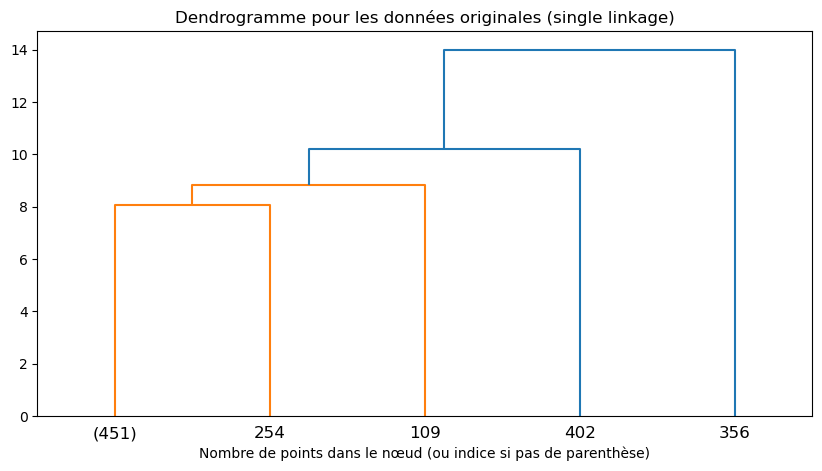

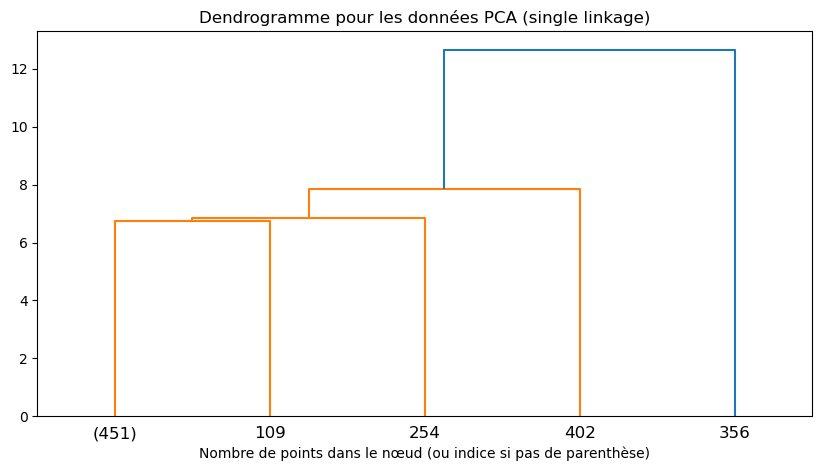


Utilisation de la méthode de liaison : complete


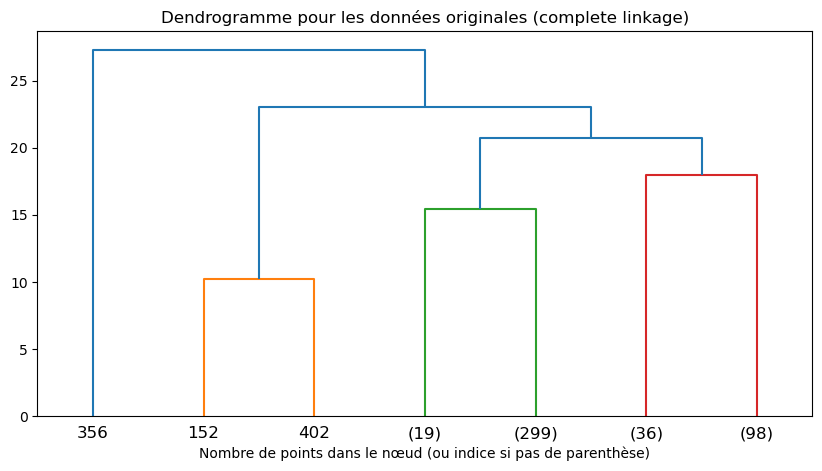

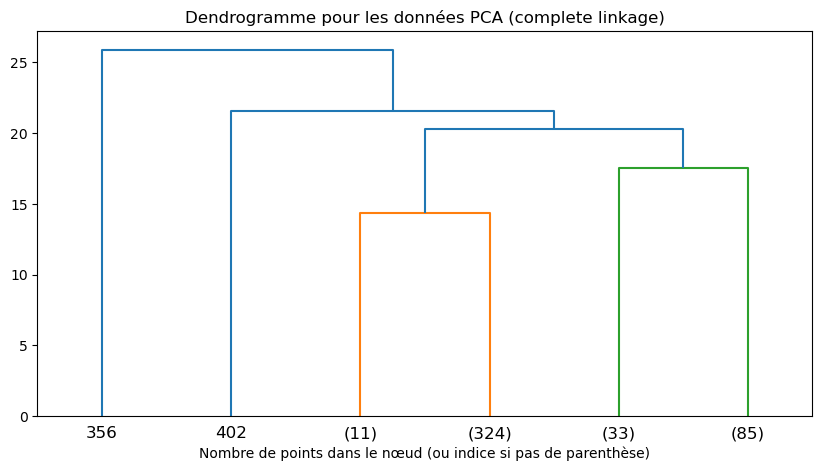


Utilisation de la méthode de liaison : average


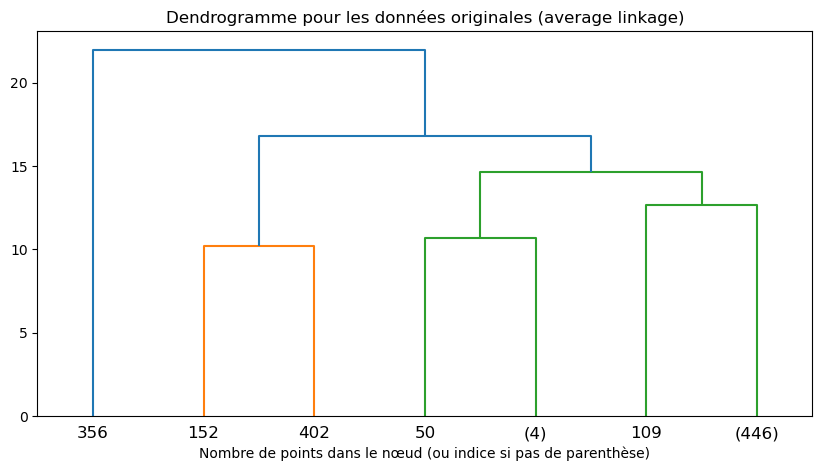

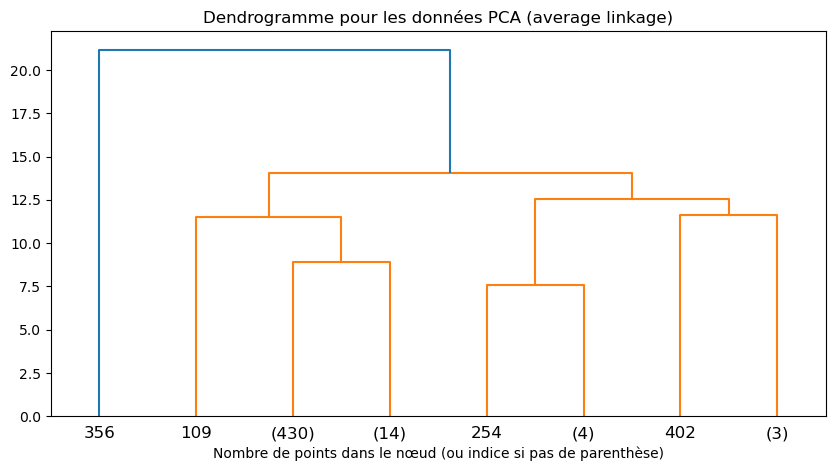

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram
from breast_cancer import BreastCancerDataset

# Fonction pour tracer un dendrogramme
def plot_dendrogram(model, **kwargs):
    # Calculer le nombre de points sous chaque nœud
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # Nœud feuille
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    # Créer la matrice de liaison
    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Tracer le dendrogramme
    dendrogram(linkage_matrix, **kwargs)

# Chargement des données
data = BreastCancerDataset()
X = data.Xtrain  # Utilisation des données d'entraînement

# Standardisation des données
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Réalisation de l'ACP pour réduire la dimensionnalité
pca = PCA(n_components=7)  # Garde environ 90 % de la variance
X_pca = pca.fit_transform(X_std)

# Tester différents types de liaison
linkage_methods = ['single', 'complete', 'average']
for linkage in linkage_methods:
    print(f"\nUtilisation de la méthode de liaison : {linkage}")
    
    # Clustering sur les données standardisées
    model_original = AgglomerativeClustering(
        distance_threshold=0, n_clusters=None, linkage=linkage
    )
    model_original = model_original.fit(X_std)

    # Clustering sur les données transformées par ACP
    model_pca = AgglomerativeClustering(
        distance_threshold=0, n_clusters=None, linkage=linkage
    )
    model_pca = model_pca.fit(X_pca)

    # Dendrogramme pour les données originales
    plt.figure(figsize=(10, 5))
    plt.title(f"Dendrogramme pour les données originales ({linkage} linkage)")
    plot_dendrogram(model_original, truncate_mode="level", p=3)
    plt.xlabel("Nombre de points dans le nœud (ou indice si pas de parenthèse)")
    plt.show()

    # Dendrogramme pour les données transformées par ACP
    plt.figure(figsize=(10, 5))
    plt.title(f"Dendrogramme pour les données PCA ({linkage} linkage)")
    plot_dendrogram(model_pca, truncate_mode="level", p=3)
    plt.xlabel("Nombre de points dans le nœud (ou indice si pas de parenthèse)")
    plt.show()


### Analyse des résultats

1. **Clustering hiérarchique :**
   - Le clustering hiérarchique est effectué en utilisant trois méthodes de liaison différentes : `single`, `complete`, et `average`.
   - Les dendrogrammes montrent les regroupements successifs des points de données jusqu'à ce qu'ils soient tous regroupés dans un seul cluster.

2. **Impact de la méthode de liaison :**
   - La méthode `single` (distance minimale) a tendance à créer des clusters allongés.
   - La méthode `complete` (distance maximale) favorise des clusters plus compacts.
   - La méthode `average` (moyenne des distances) est un compromis entre les deux.

3. **Impact des données standardisées vs PCA :**
   - Sur les données standardisées, les dendrogrammes reflètent directement les distances calculées sur toutes les variables d'origine.
   - Avec les données PCA, la réduction de dimensionnalité peut simplifier les structures complexes en se concentrant sur les dimensions principales.

4. **Interprétation des résultats :**
   - Les différences dans les dendrogrammes pour chaque méthode et chaque type de données indiquent l'impact de la méthodologie choisie sur les regroupements obtenus.
   - Les PCA-transformed data peuvent offrir des résultats plus robustes si certaines dimensions originales sont moins informatives.


### Step 2: K-Means Clustering

* **Determine Number of Clusters:**
    * Use the insights gained from the hierarchical clustering dendrogram to determine an appropriate number of clusters for K-Means.
* **K-Means Clustering:**
    * Apply the `KMeans` class from scikit-learn to perform non-hierarchical clustering with the chosen number of clusters.



c:\Users\andre\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\andre\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")
c:\Users\andre\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\andre\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, wh

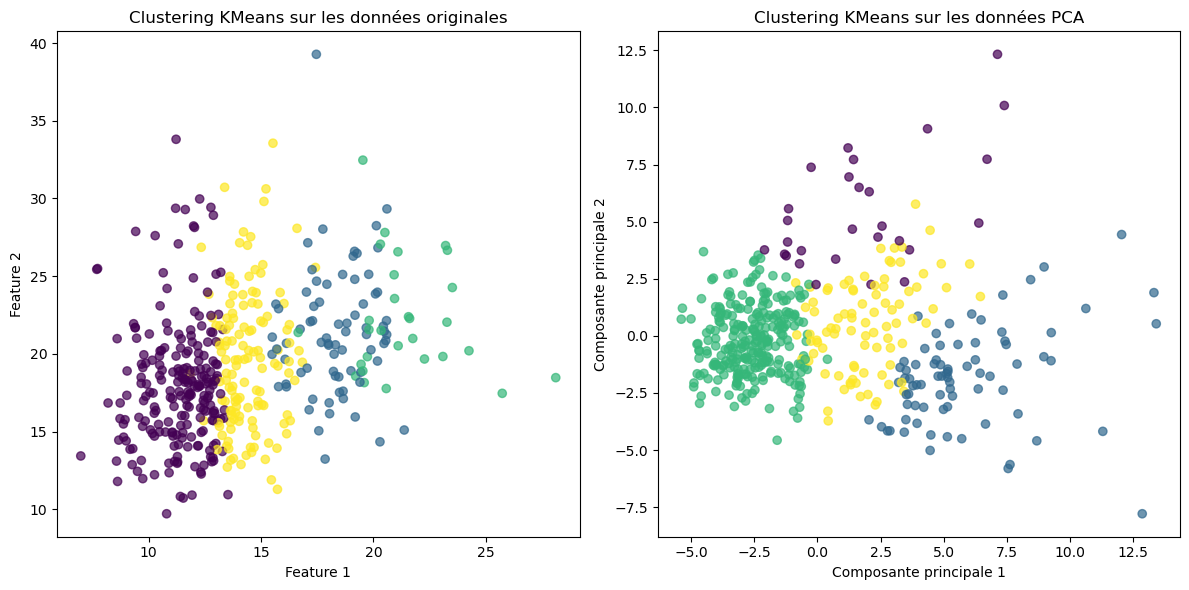

Centres des clusters (données originales) :
[[1.13654771e+01 1.79585321e+01 7.29283945e+01 4.01343578e+02
  9.43384862e-02 8.00204128e-02 4.56194344e-02 2.36835780e-02
  1.78170642e-01 6.44689908e-02 2.84925688e-01 1.29320688e+00
  1.99956697e+00 1.97201193e+01 7.92169266e-03 2.22304633e-02
  2.77126128e-02 1.00167385e-02 2.22533945e-02 3.90051009e-03
  1.25191789e+01 2.36730275e+01 8.11682110e+01 4.84004587e+02
  1.28567752e-01 1.82896927e-01 1.64931560e-01 7.00462018e-02
  2.77899541e-01 8.13172477e-02]
 [1.83486667e+01 2.13502667e+01 1.21245333e+02 1.05222533e+03
  1.00882267e-01 1.44619600e-01 1.60295200e-01 9.22016000e-02
  1.92248000e-01 6.13658667e-02 6.52526667e-01 1.27557067e+00
  4.61408000e+00 7.61936000e+01 6.71036000e-03 3.18044667e-02
  4.10925333e-02 1.59597600e-02 2.03466667e-02 4.06441333e-03
  2.20236000e+01 2.85421333e+01 1.46746667e+02 1.49078667e+03
  1.40818933e-01 3.46890133e-01 4.23705333e-01 1.82172800e-01
  3.10512000e-01 8.69024000e-02]
 [2.14044828e+01 2.218

In [11]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

# Chargement des données
from breast_cancer import BreastCancerDataset
data = BreastCancerDataset()
X_original = data.Xtrain  # Données originales (non transformées)

# Nombre de clusters déterminé à partir du clustering hiérarchique
n_clusters = 4  # Remplacez ce nombre par le résultat obtenu dans l'exercice précédent

# KMeans sur les données originales
kmeans_original = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42)
labels_original = kmeans_original.fit_predict(X_original)

# KMeans sur les données transformées par PCA
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardisation des données
scaler = StandardScaler()
X_std = scaler.fit_transform(X_original)

# Transformation PCA
pca = PCA(n_components=7)  # Garde 90 % de la variance
X_pca = pca.fit_transform(X_std)

# KMeans sur les données PCA
kmeans_pca = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42)
labels_pca = kmeans_pca.fit_predict(X_pca)

# Visualisation des résultats
plt.figure(figsize=(12, 6))

# Clusters sur les données originales
plt.subplot(1, 2, 1)
plt.scatter(X_original[:, 0], X_original[:, 1], c=labels_original, cmap='viridis', alpha=0.7)
plt.title('Clustering KMeans sur les données originales')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Clusters sur les données PCA
plt.subplot(1, 2, 2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels_pca, cmap='viridis', alpha=0.7)
plt.title('Clustering KMeans sur les données PCA')
plt.xlabel('Composante principale 1')
plt.ylabel('Composante principale 2')

plt.tight_layout()
plt.show()

# Affichage des centres de clusters
print("Centres des clusters (données originales) :")
print(kmeans_original.cluster_centers_)

print("\nCentres des clusters (données PCA) :")
print(kmeans_pca.cluster_centers_)


## Analyse des résultats

1. **Clustering non hiérarchique avec KMeans :**
   - Le clustering KMeans a été appliqué en utilisant le nombre de clusters déterminé à partir du clustering hiérarchique.
   - Les centres des clusters ont été calculés à partir des données originales et des données transformées par ACP.

2. **Comparaison des résultats :**
   - Les clusters sur les données originales utilisent les caractéristiques brutes des données, ce qui peut être influencé par l'échelle des variables.
   - Les clusters sur les données PCA sont basés sur les composantes principales, qui capturent les directions de variance maximale, réduisant potentiellement le bruit ou les redondances.

3. **Visualisation :**
   - Les graphiques montrent comment les observations sont regroupées en clusters. 
   - Les données PCA permettent une réduction de dimensionnalité, facilitant la visualisation tout en conservant l'essentiel de la structure des données.

4. **Centres des clusters :**
   - Les centres des clusters donnent une idée de la position moyenne de chaque cluster dans l'espace des données. 
   - Pour les données PCA, ces centres sont exprimés dans l'espace des composantes principales.

Le clustering KMeans est une méthode rapide et efficace, mais ses résultats dépendent fortement du choix du nombre de clusters et de la qualité des données d'entrée.


### Step 3: Cluster Analysis

* **Cluster Analysis:**
    * Analyze the distribution of the diagnosis variable (benign/malignant) within each cluster. 
    * Determine if the diagnosis is evenly distributed across clusters or if there is a significant difference in the distribution of diagnoses between clusters.


c:\Users\andre\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


Distribution Cluster vs Diagnosis (normalisée) :
Diagnosis         0         1
Cluster                      
0          0.643836  0.356164
1          0.046875  0.953125
2          1.000000  0.000000
3          1.000000  0.000000


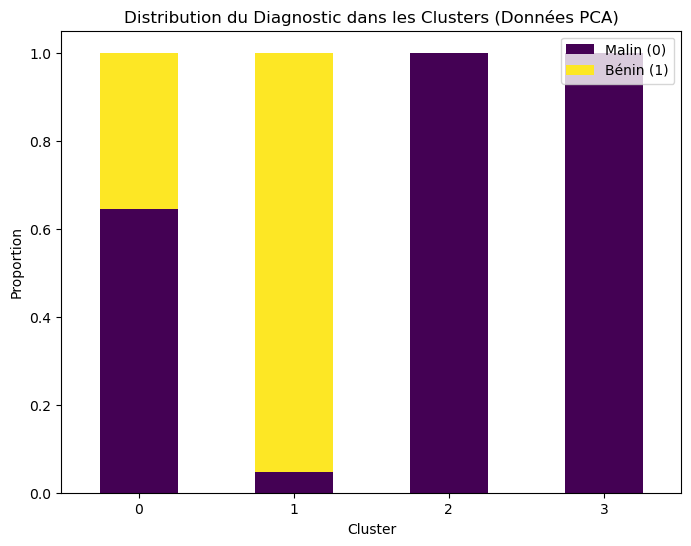

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Charger le jeu de données du cancer du sein
data = load_breast_cancer()
X = data.data  # Caractéristiques
y = data.target  # Diagnostic : 0 = malin, 1 = bénin

# Réaliser la transformation PCA
pca = PCA(n_components=2)  # Réduction à 2 composantes principales
X_pca = pca.fit_transform(X)

# Appliquer le clustering KMeans sur les données transformées par PCA
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(X_pca)  # Obtenir les étiquettes des clusters

# Créer un DataFrame pour l'analyse
df = pd.DataFrame({
    "Cluster": clusters,
    "Diagnosis": y
})

# Analyser la distribution du diagnostic dans les clusters
distribution = pd.crosstab(df["Cluster"], df["Diagnosis"], normalize="index")

# Afficher la distribution
print("Distribution Cluster vs Diagnosis (normalisée) :")
print(distribution)

# Visualiser la distribution
distribution.plot(kind="bar", stacked=True, figsize=(8, 6), colormap="viridis")
plt.title("Distribution du Diagnostic dans les Clusters (Données PCA)")
plt.xlabel("Cluster")
plt.ylabel("Proportion")
plt.legend(["Malin (0)", "Bénin (1)"])
plt.xticks(rotation=0)
plt.show()


## Analyse des résultats

1. **Objectif :**
   - L'objectif est de déterminer si la variable de diagnostic (malin ou bénin) est distribuée de manière similaire dans tous les clusters obtenus par KMeans.

2. **Méthodologie :**
   - La distribution du diagnostic dans chaque cluster est analysée en utilisant un tableau croisé (`pd.crosstab`) avec une normalisation par ligne pour obtenir des proportions.
   - Les proportions permettent de comparer la composition de chaque cluster en termes de diagnostics.

3. **Visualisation :**
   - Un graphique en barres empilées montre clairement les proportions de diagnostics (malin ou bénin) dans chaque cluster.

4. **Interprétation :**
   - Si les proportions de diagnostics diffèrent significativement entre les clusters, cela suggère que le diagnostic est un facteur discriminant pour la formation des clusters.
   - Si les proportions sont similaires, cela indique que les clusters ne reflètent pas directement la variable de diagnostic.

5. **Conclusion :**
   - En fonction des résultats affichés et du graphique, nous pouvons conclure si la variable de diagnostic est uniformément répartie ou non dans les clusters.


# Correctif

Zero-centered data
1 components needed to get >90% EVR
Standardized data
7 components needed to get >90% EVR


c:\Users\andre\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


label=0: 0->4 / 1->164
label=1: 0->58 / 1->0
label=2: 0->56 / 1->5
label=3: 0->39 / 1->118
label=4: 0->11 / 1->0


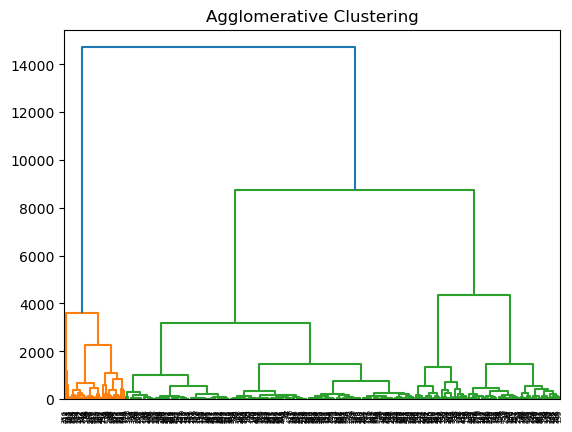

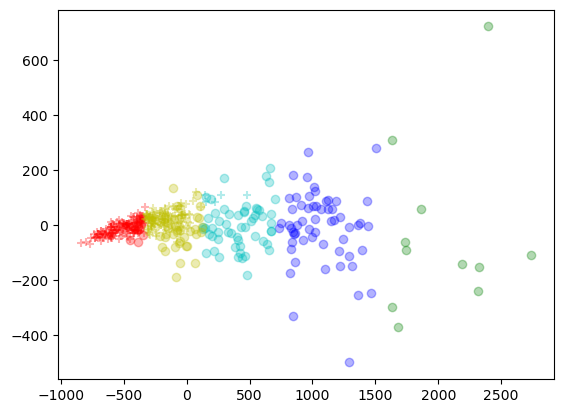

c:\Users\andre\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


label=0: 0->28 / 1->270
label=1: 0->140 / 1->17


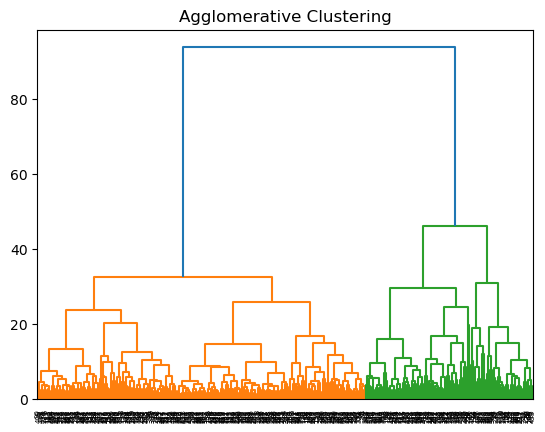

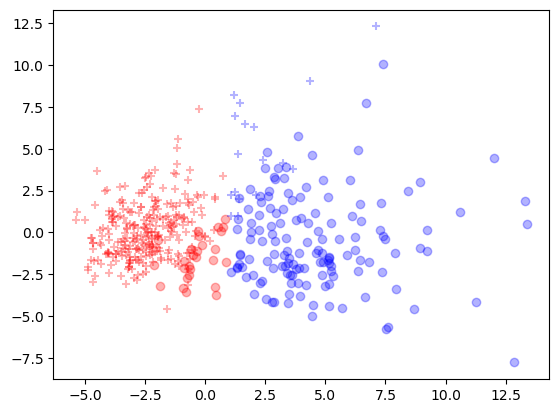

In [15]:
"""Analysis of the Breast Cancer Data"""

import itertools
from matplotlib import pyplot as plt
import numpy as np
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.decomposition import PCA
from breast_cancer import BreastCancerDataset
from scipy.cluster.hierarchy import dendrogram


def pca_manual(Xc: np.ndarray) -> tuple[np.ndarray, np.ndarray]:
    """Compute PCA from the eigendecomposition of the variance-covariance matrix.
    
    Expects the zero-centered point cloud as input.
    Xc should have variables as columns and individuals as rows."""
    S = np.cov(Xc, rowvar=False)
    evalues, evectors = np.linalg.eig(S)
    o = np.argsort(evalues)[::-1]
    evalues = evalues[o]
    evectors = evectors[:, o]
    evr = evalues/evalues.sum()
    
    return evr, evectors


def n_for_evr(evr: np.ndarray, t: float = 0.90) -> int:
    """Computes the number of PC that need to be kept to obtain t 
    cumulative explained variance ratio."""
    cevr = itertools.accumulate(evr) # generator that accumulates value of evr (i.e. computes cumulative sum)
    for n, c in enumerate(cevr): 
        if c > 0.9:
            break
    return n+1


def show_corrcoeff(Xc: np.ndarray):
    R = np.corrcoef(Xc, rowvar=False)
    plt.figure()
    plt.imshow(R)
    plt.colorbar()
    plt.show()


def plot_dendrogram(model, **kwargs):
    """From https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html"""
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)


def pca_analysis(X: np.ndarray):
    """Check that we get the same result with the manual version and with the 
    sklearn version"""
    evr, evectors = pca_manual(X)
    n = n_for_evr(evr, 0.9)
    
    pca = PCA(n_components=30)
    pca.fit(X)
    n2 = n_for_evr(pca.explained_variance_ratio_, 0.9)
    assert n==n2
    print(f"{n} components needed to get >90% EVR")


def clustering_analysis(X: np.ndarray, Y: np.ndarray, n_clusters: int = 6):
    """Plot dendrogram from Agglomerative Clustering.
    
    Performs K-Means and plot the resulting groups in 2D space computed from PCA."""
    clu = AgglomerativeClustering(n_clusters=None, distance_threshold=0)
    clu.fit(X)
    plt.figure()
    plt.title("Agglomerative Clustering")
    plot_dendrogram(clu)
    # plt.show() 

    km = KMeans(n_clusters=n_clusters)
    labels = km.fit_predict(X)
    for l in np.unique(labels):
        mask = labels==l
        print(f"label={l}: 0->{(Y[mask]==0).sum()} / 1->{(Y[mask]==1).sum()}")

    pca = PCA(n_components=2)
    X2d = pca.fit_transform(X)
    colors = ['r', 'b', 'c', 'y', 'g', 'k', 'p']
    plt.figure()
    for l in np.unique(labels):
        mask = labels==l
        mask_T = mask * (Y==1)
        mask_F = mask * (Y==0)
        plt.scatter(X2d[mask_T, 0], X2d[mask_T, 1], marker='+', color=colors[l], alpha=0.3)
        plt.scatter(X2d[mask_F, 0], X2d[mask_F, 1], marker='o', color=colors[l], alpha=0.3)
    plt.show()

def main():
    data = BreastCancerDataset()
    Xtrain = data.Xtrain

    Xc = Xtrain-Xtrain.mean(axis=0)
    Zc = Xc / (Xc.std(axis=0, ddof=1))

    print("Zero-centered data")
    pca_analysis(Xc)
    print("Standardized data")
    pca_analysis(Zc)

    clustering_analysis(Xc, data.Ytrain, n_clusters=5)
    clustering_analysis(Zc, data.Ytrain, n_clusters=2)


if __name__ == "__main__":
    main()
